# SPOTIFY DATA 2019 :

title = Song's title <br>
artist = Song's artist <br>
top genre = the genre of the track<br>
year = Song's year <br>
beats_per_minute = Beats per minute - The tempo of the song <br>
Energy = The Energy of a song - the higher the value, the more energetic song <br>
Danceability = The higher the value, the easier it is the dance to this song <br>
Loudness_dB = Loudness dB higher the value louder the song <br>
Liveness = Liveness : the higher the value, the more likely the song is a live recording <br>
Valence = Valence  : The higher the value, the more positive mood for the song.<br>
Length = Duration : Length of the song <br>
acous = Acousticness - The higher the value the more acoustic the song is <br>
Speechiness = Speechiness - The higher the value the more spoken word the song contains <br>
Popularity = Popularity - The higher the value the more popular the song is<br>
country = Country where the son was famous <br>



libraries : 
    

In [33]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
sns.set()

import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
spotify2.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [46]:
spotify = pd.read_csv('top50contry.csv', encoding='ISO-8859-1')
spotify2 = pd.read_csv('top50.csv', encoding = 'ISO-8859-1')
spotify.head()
#spotify2.head()
spotify.rename(columns = {'Unnamed: 0':'Index', 
                          'bpm':'beeats_per_minute',
                          'nrgy':'Energy',
                          'dnce':'Danceability',
                          'dB':'Loudness_dB',
                          'live':'Liveness',
                          'val':'Valence',
                          'dur':'Length',
                          'acous':'Acousticness',
                          'spch':'Speechiness',
                          'pop':'Popularity'                         
                         }, inplace = True)


spotify = spotify.drop(['Index','added'],axis=1)

spotify

,title,artist,top genre,year,beeats_per_minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,country
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Feelings,Lauv,pop,2019,103.0,47.0,69.0,-7.0,10.0,25.0,190,9.0,4.0,73,malasya
996,Mimpi (feat. Alif),K-Clique,malaysian indie,2019,150.0,73.0,83.0,-7.0,10.0,87.0,253,53.0,29.0,66,malasya
997,Cinta Luar Biasa,Andmesh,indonesian pop,2019,136.0,23.0,58.0,-12.0,10.0,32.0,256,81.0,3.0,66,malasya
998,Haa Tepok,MeerFly,malaysian hip hop,2019,87.0,50.0,85.0,-12.0,15.0,68.0,211,66.0,31.0,65,malasya


# DATA INFORMATION  AND DESCRIPTION

In [34]:
# PORFILE REPORT
profile = ProfileReport(spotify,title = 'PROFILE REPORT')

profile.to_file("your_report.html")


In [35]:
profile.to_widgets() # Gives thes result widget format 


# MISSING VALUES  : 
    

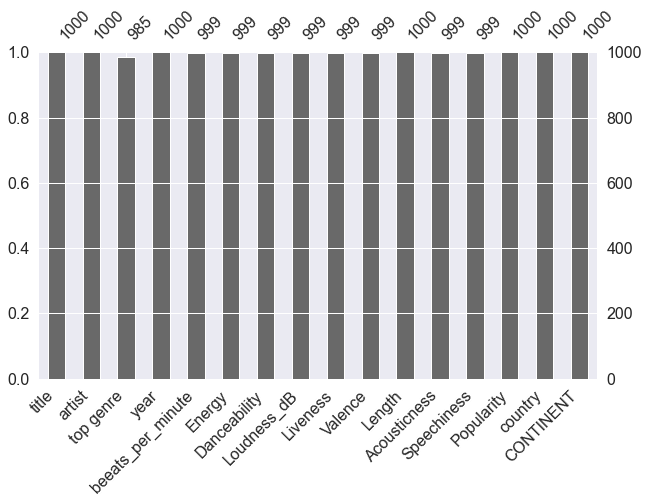

In [104]:
import missingno as msno
msno.bar(spotify, figsize=(10,6));

There area very few missing data it is not effective to our analysis

Are there any relation between missin values ? 


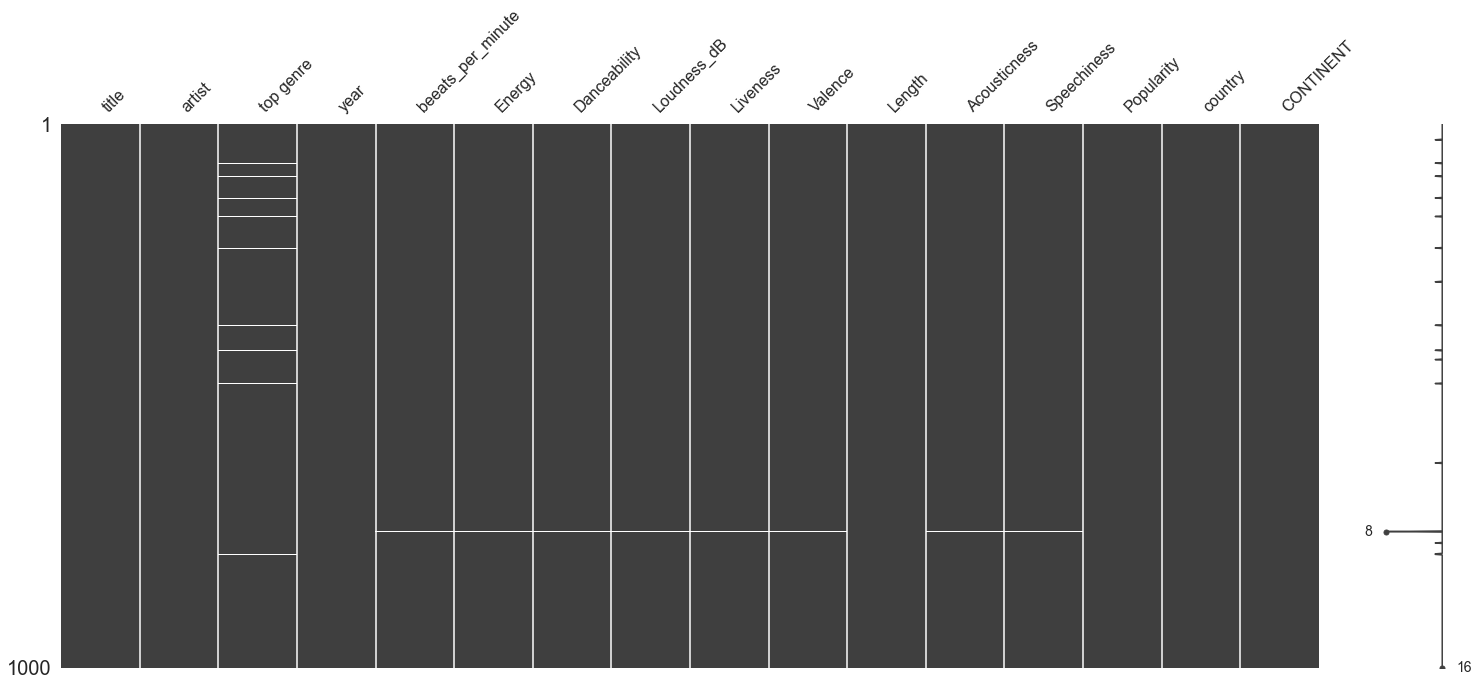

In [107]:
import missingno as msno
msno.matrix(spotify);

There is only one missing song that has conection so we can get rid of that ! 

In [47]:
cols = spotify.columns.tolist()
cols

['title',
 'artist',
 'top genre',
 'year',
 'beeats_per_minute',
 'Energy',
 'Danceability',
 'Loudness_dB',
 'Liveness',
 'Valence',
 'Length',
 'Acousticness',
 'Speechiness',
 'Popularity',
 'country']

Lets check the related pairplot : 

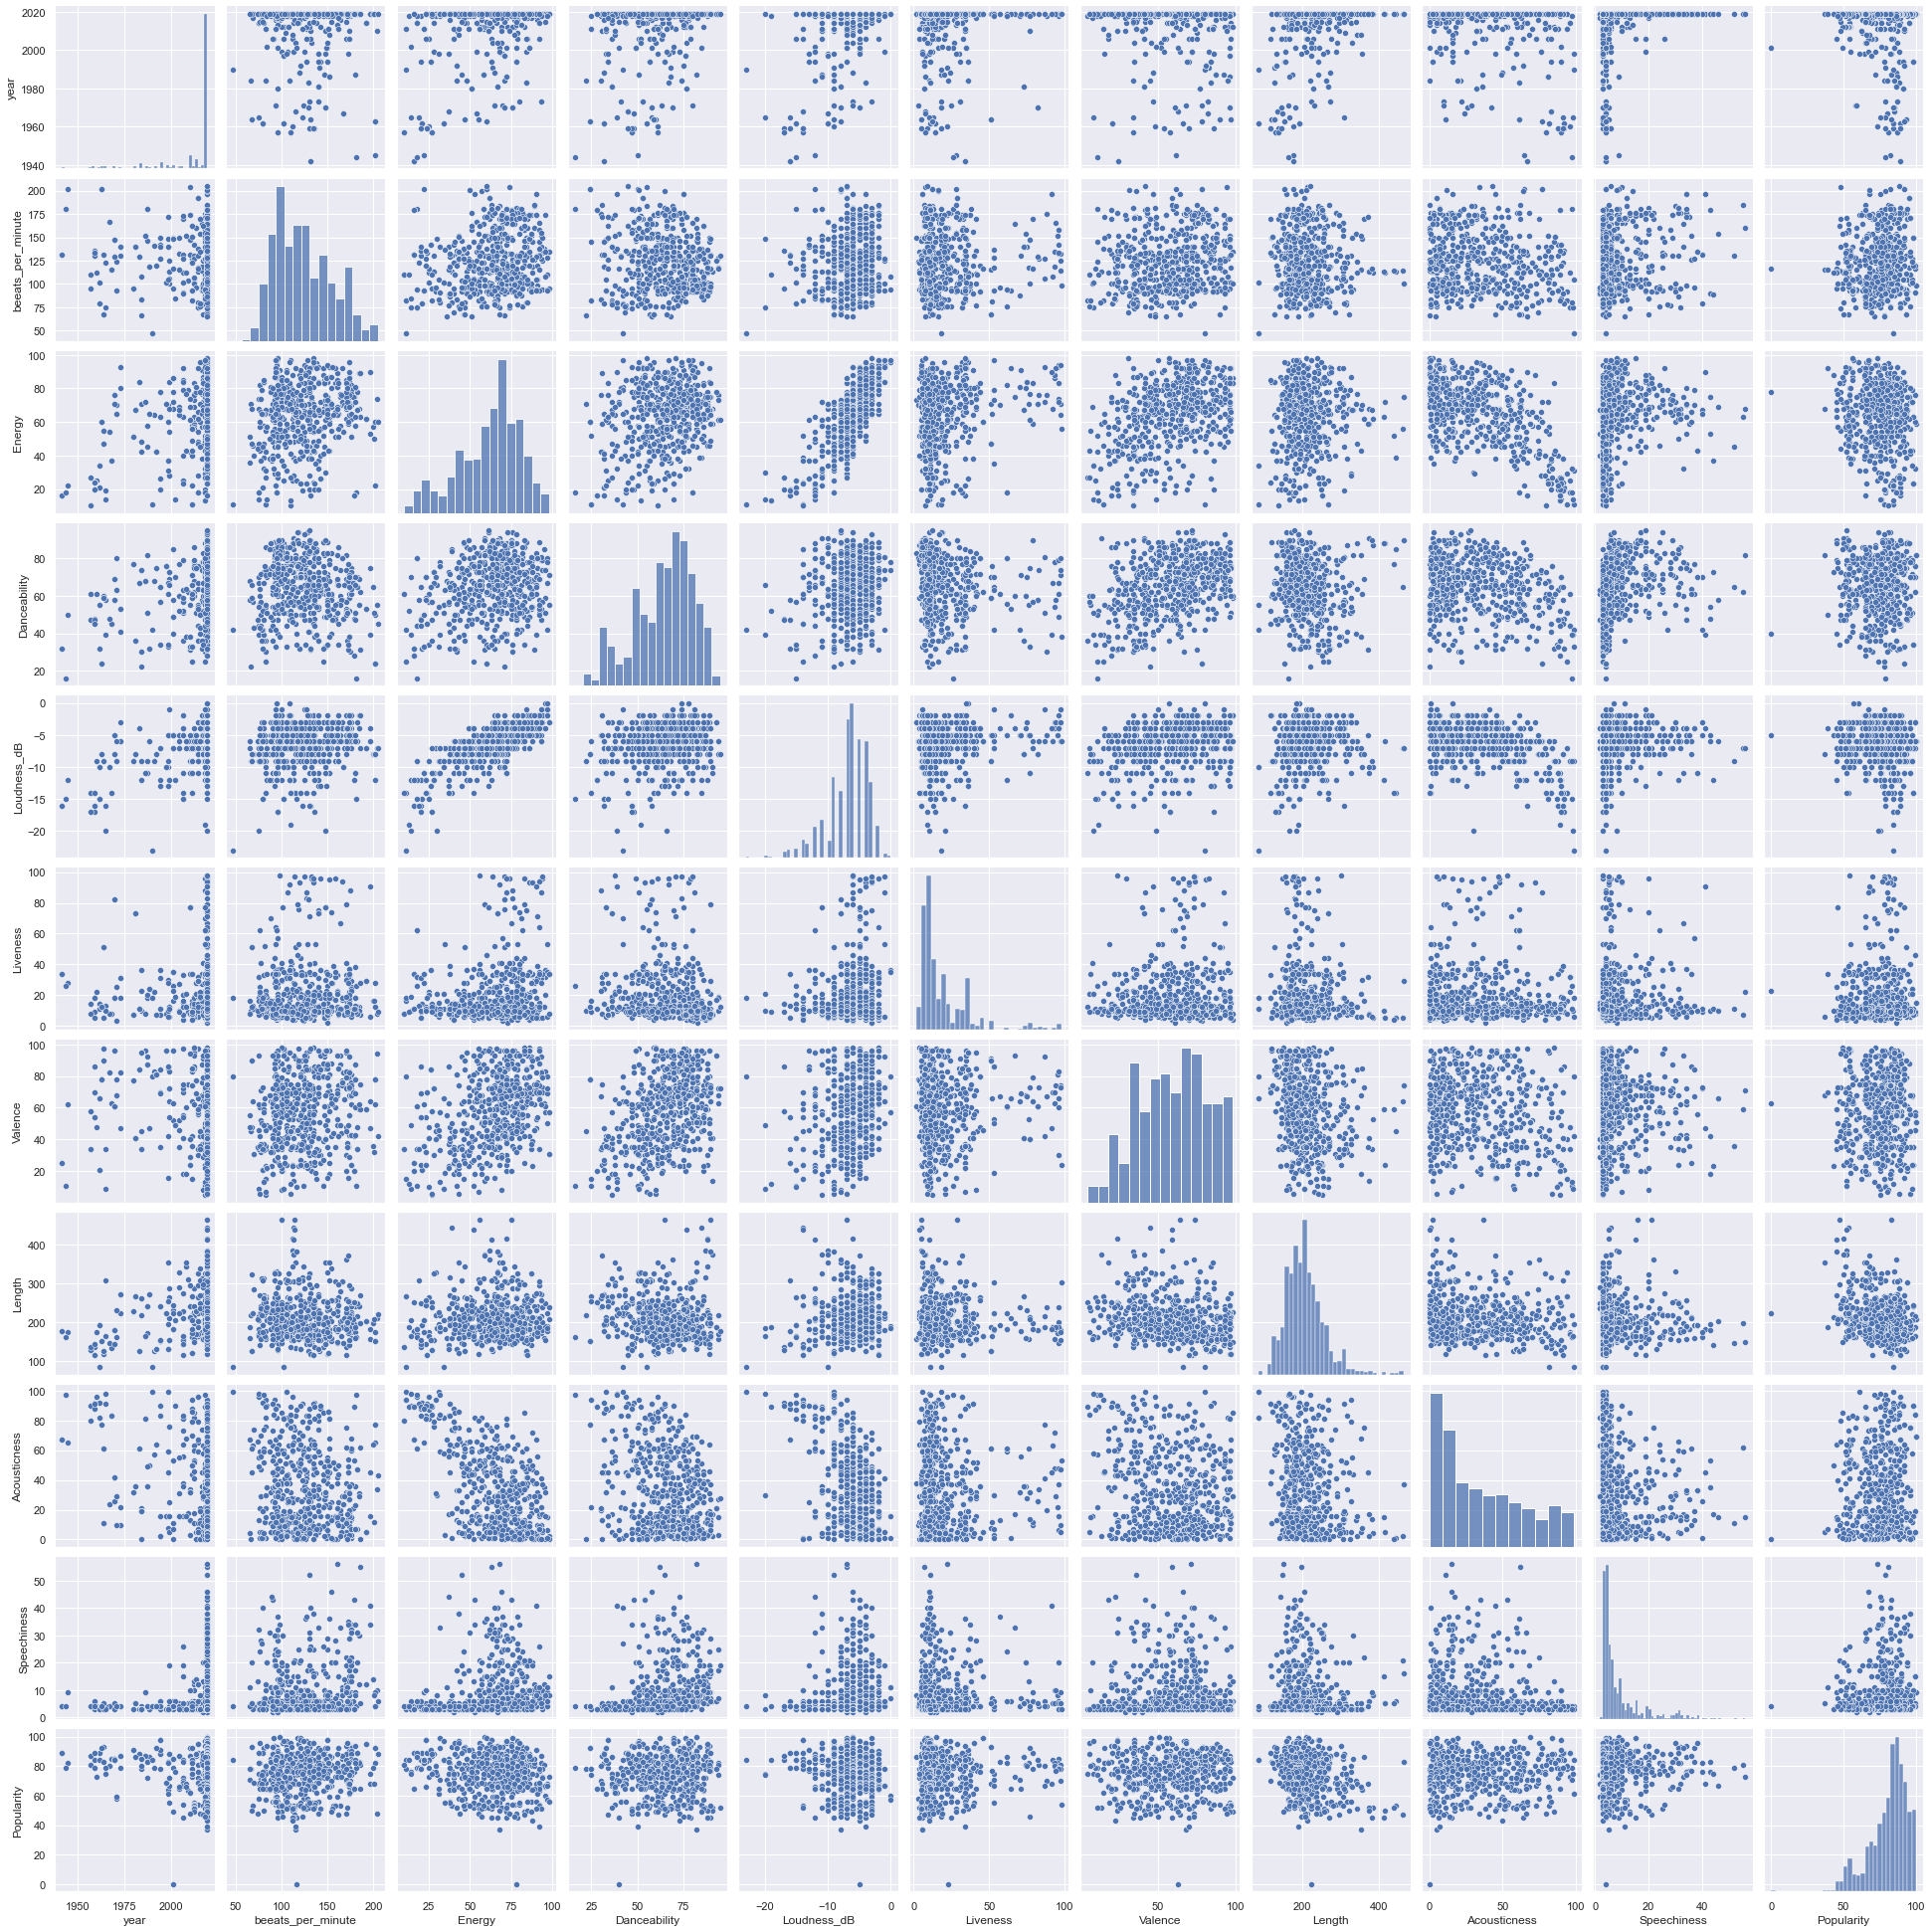

In [51]:
pp = sns.pairplot(data=spotify)

There are some critical observations we can see : 
    Most of the attributes are skewed such as speechness, liveness, Loudness_dB etc.
    

Lets check the corraletion in order to see what features are connected 

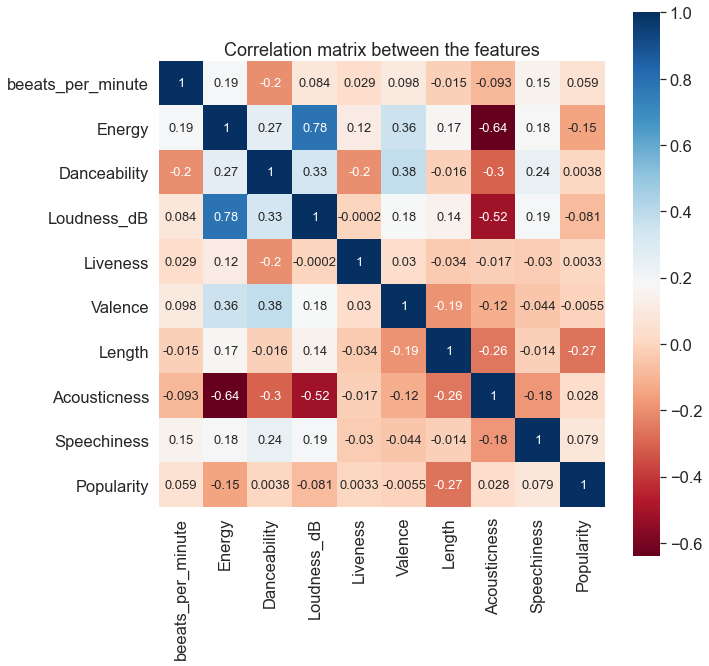

In [55]:
#categor = spotify['top genre','year','country']
spt_num = spotify.drop(['top genre','year','country'],axis=1)
sns.set(font_scale=1.5)  
correlation_matrix = spt_num.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdBu',annot_kws={'size': 13})
plt.title('Correlation matrix between the features')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

We can see accoustic songs likely to have a low energy level
and Loud musics are generally tends to have high energy level. In a way energy level can interpret loudness and accousticness <br>

Moreover popularity tends to be affected negatively from lenth of the song with small proportion

# HYPHOTESIS : 

My hyphotesis is that there is a difference in terms of taste of music in between continents. So what I expect is that the countries closer to each other culturaly and share same continent would listen smilar featured musics

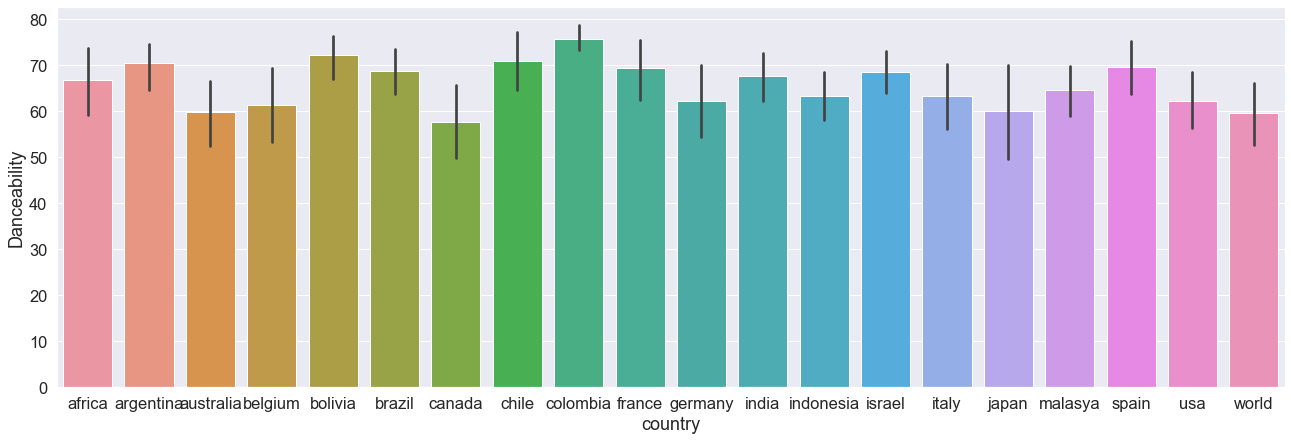

In [80]:
spt_grup = spotify.drop('year',axis=1)
y1 = spotify.groupby(['country','top genre']).mean()
y1.reset_index(inplace=True)

fig = plt.figure(figsize = (22,7))
sns.barplot(x='country', y = 'Danceability', data=y1);
plt.show()


We can see that the countries closer to each other have similar danceability value in musics.
Such as : 
    Argentina - Brazil - Chile - Bolivia - Columbia
    Germnay - Italy - Belgium ( except france spain. On the other hand, it is still logical considering that Spain historically affected South America and culturally closer to them rather than location of Europe )
    

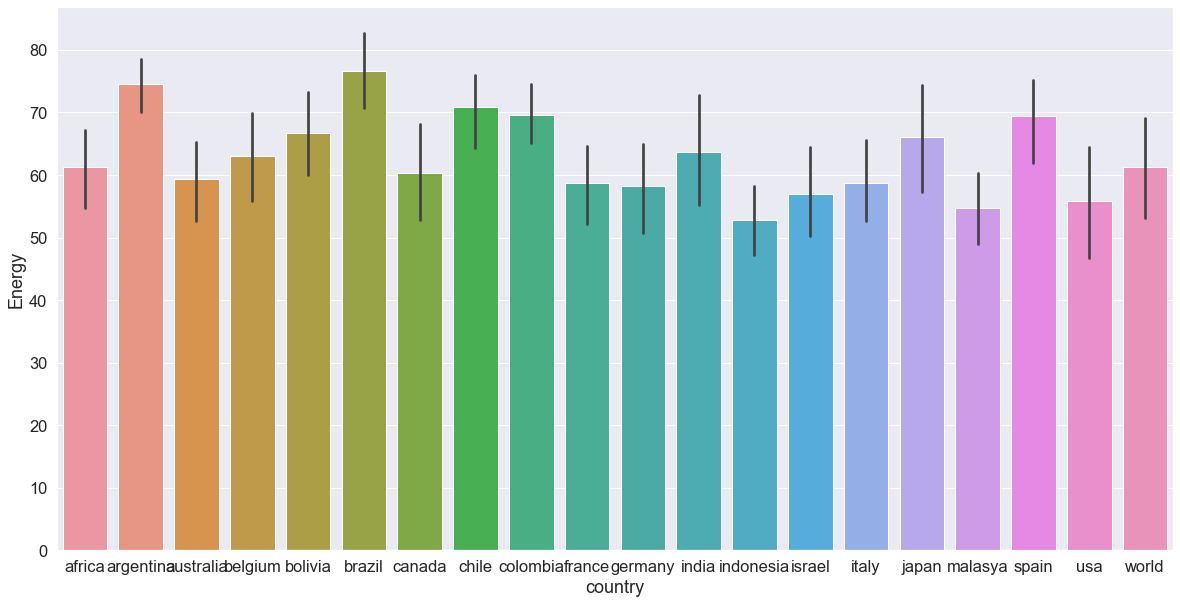

In [75]:
fig = plt.figure(figsize = (20,10))
sns.barplot(x='country', y = 'Energy', data=y1);


In [ ]:
Energy levels also pointing out that HISPANIC countries have smilarities and European countries have smilarities

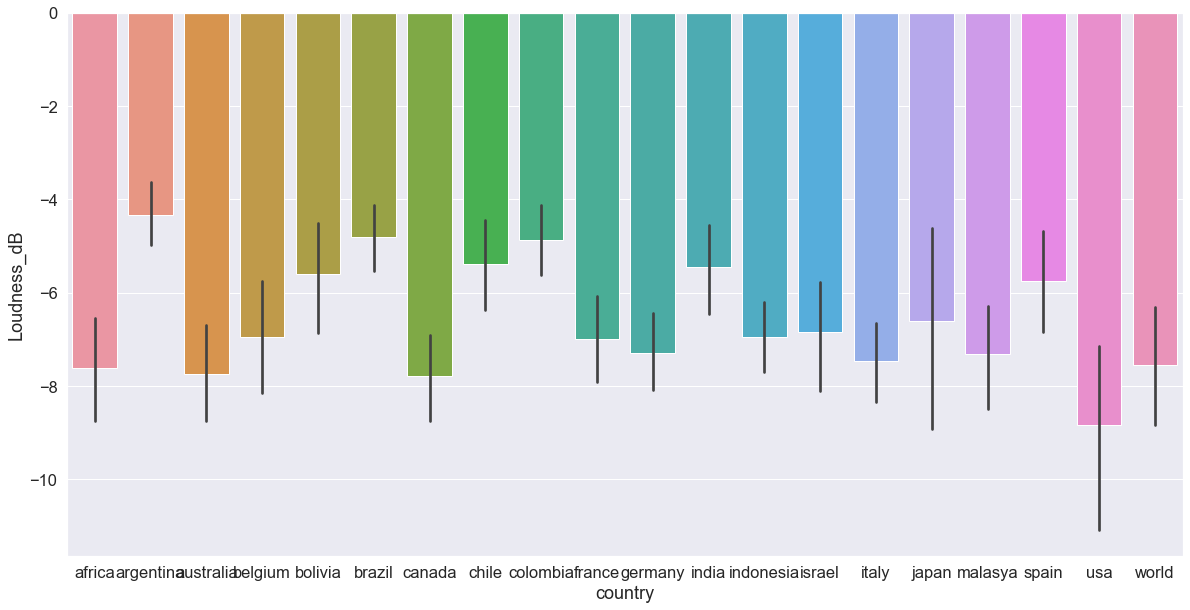

In [76]:
fig = plt.figure(figsize = (20,10))
sns.barplot(x='country', y = 'Loudness_dB', data=y1);


Finally,
We can see that loudness change according to countries but locationaly close countries tend to have same loudness level in musics <br>
such as : <br>

in South America : Argentina, Brazil, Chile, Columbia and Bolivia have smilarities <br>

in Europe :  we can see france - germany - italy and belgium have smilarities <br>

Therefore, it is possible to say that cultural smilarities + location is great hint to understand potential popularity of the song types in a specific country! 

In [83]:
arr = []
for i in range(len(spotify)):
    if spotify.iloc[i]['country'] in ['argentina','bolivia','chile','colombia','brazil'] : 
        arr.append('SOUTH AMERICA')
    elif spotify.iloc[i]['country'] in ['usa','canada'] : 
        arr.append('NORT AMERICA')
    elif spotify.iloc[i]['country'] in ['italy','belgium','france','germany','spain'] :
        arr.append('EUROPE')
    elif spotify.iloc[i]['country'] in ['malasya','india','indonesia','japan','israel'] : 
        arr.append('ASIA')
    elif spotify.iloc[i]['country'] in ['australia']:
        arr.append('AUSTRALIA')
    elif spotify.iloc[i]['country'] in ['world'] : 
        arr.append('WORLD')
    else :
        arr.append('AFFRICA')

spotify['CONTINENT'] = arr

In [84]:
spotify

,title,artist,top genre,year,beeats_per_minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,country,CONTINENT
0,Dance Monkey,Tones and I,australian pop,2019,98.0,59.0,82.0,-6.0,15.0,51.0,209,69.0,9.0,100,world,WORLD
1,ROXANNE,Arizona Zervas,pop rap,2019,117.0,60.0,62.0,-6.0,46.0,46.0,164,5.0,15.0,99,world,WORLD
2,Memories,Maroon 5,pop,2019,91.0,32.0,76.0,-7.0,8.0,57.0,189,84.0,5.0,99,world,WORLD
3,Circles,Post Malone,dfw rap,2019,120.0,76.0,70.0,-3.0,9.0,55.0,215,19.0,4.0,99,world,WORLD
4,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150.0,63.0,34.0,-7.0,7.0,35.0,241,16.0,4.0,98,world,WORLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Feelings,Lauv,pop,2019,103.0,47.0,69.0,-7.0,10.0,25.0,190,9.0,4.0,73,malasya,ASIA
996,Mimpi (feat. Alif),K-Clique,malaysian indie,2019,150.0,73.0,83.0,-7.0,10.0,87.0,253,53.0,29.0,66,malasya,ASIA
997,Cinta Luar Biasa,Andmesh,indonesian pop,2019,136.0,23.0,58.0,-12.0,10.0,32.0,256,81.0,3.0,66,malasya,ASIA
998,Haa Tepok,MeerFly,malaysian hip hop,2019,87.0,50.0,85.0,-12.0,15.0,68.0,211,66.0,31.0,65,malasya,ASIA


In [113]:
spt_grup = spotify.drop('year',axis=1)
y1 = spotify.groupby(['CONTINENT','country','top genre']).mean()
y1.reset_index(inplace=True)


<Figure size 1440x720 with 0 Axes>

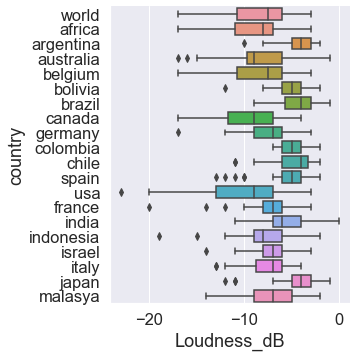

In [162]:
fig = plt.figure(figsize = (20,10))

sns.catplot(x = "Loudness_dB", y = "country", kind = "box", data = spotify)



<Figure size 1440x720 with 0 Axes>

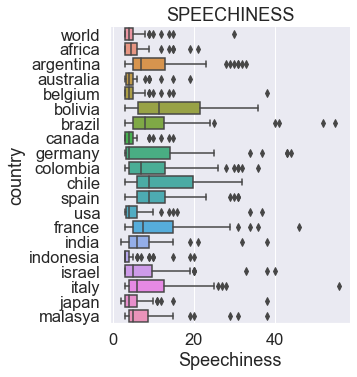

In [295]:
fig = plt.figure(figsize = (20,10))

sns.catplot(x = "Speechiness", y = "country", kind = "box", data = spotify);
plt.title('SPEECHINESS');



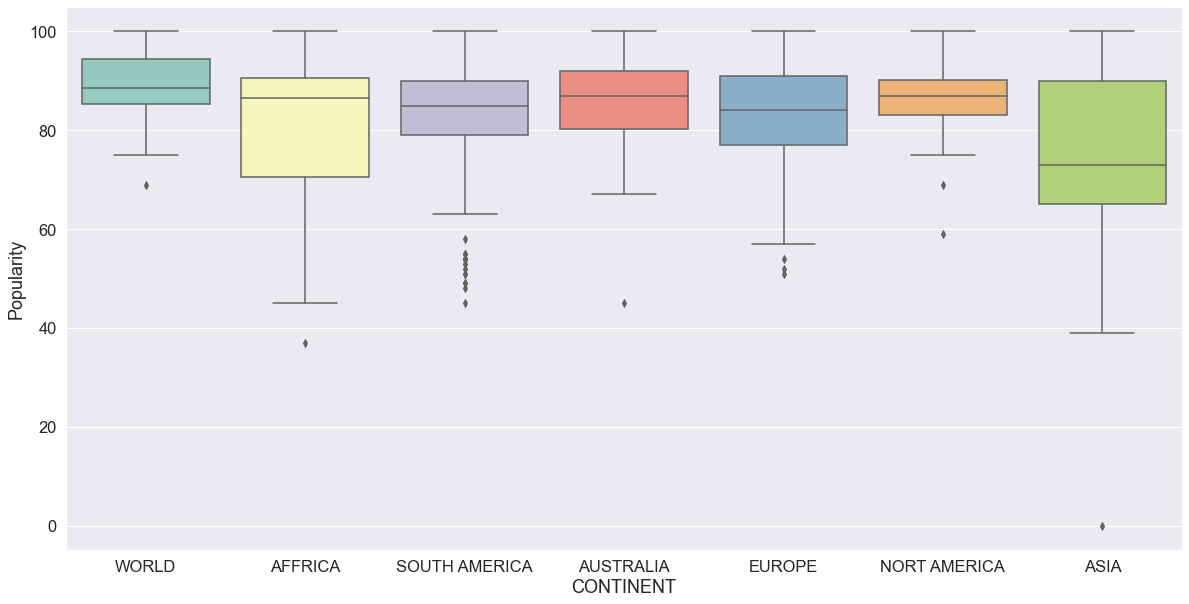

In [112]:
fig = plt.figure(figsize = (20,10))
ax = sns.boxplot(x="CONTINENT", y="Popularity",
                 data=spotify, palette="Set3")

Popularity box plots show the range of the top 50 lists.
Biggest continents ASIA and Affrica has wide range as expected.
Althgouh we have several countries in europe and south america they are listening similar musics.



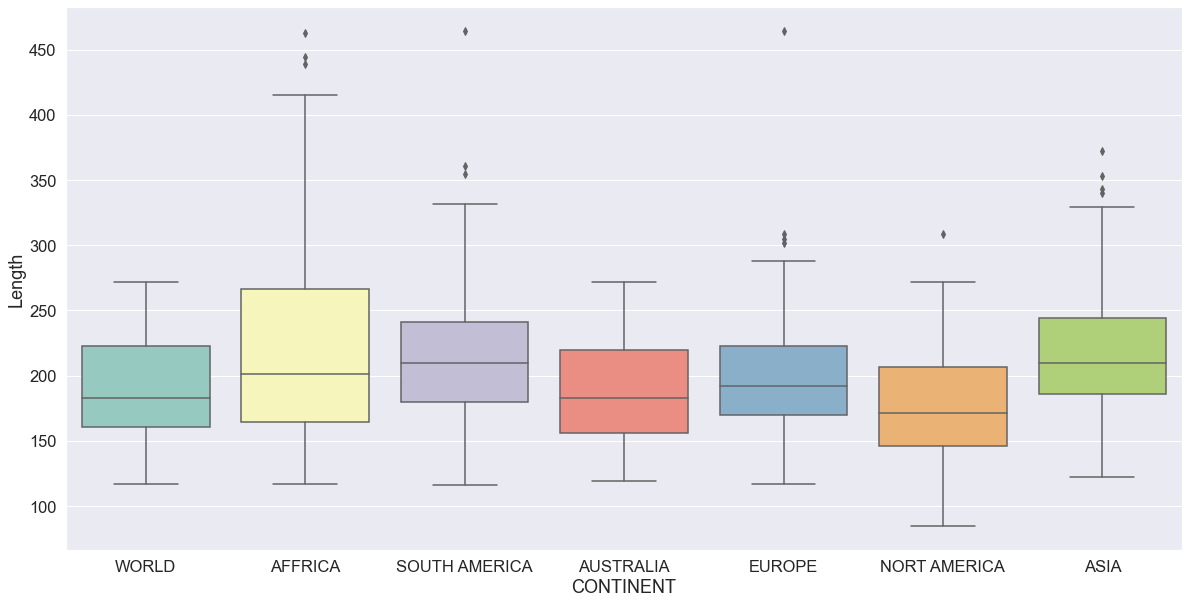

In [102]:
fig = plt.figure(figsize = (20,10))
ax = sns.boxplot(x="CONTINENT", y="Length",
                 data=spotify, palette="Set3")

Although the mean length of the songs in affrica is smilar to others it has very long musics in their top 50 lists.

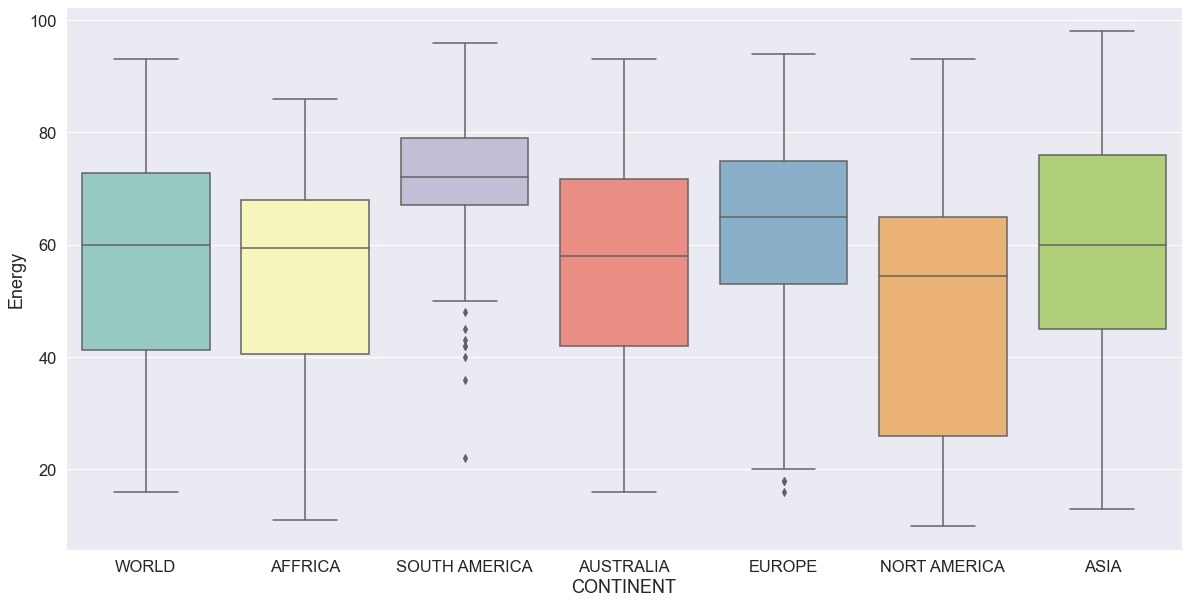

In [111]:
fig = plt.figure(figsize = (20,10))
ax = sns.boxplot(x="CONTINENT", y="Energy",
                 data=spotify, palette="Set3")

We can come up with the idea that south america is prefered more energetic musics compare to other countries.

### My second hyphotesis : 

Here is my second hyphothesis that all countries listen their own local musics rather than other music genres : 


I use word cloud analysis. I basically count the number of worlds in the genres and number of appearances showes me better view for the genre popularity 

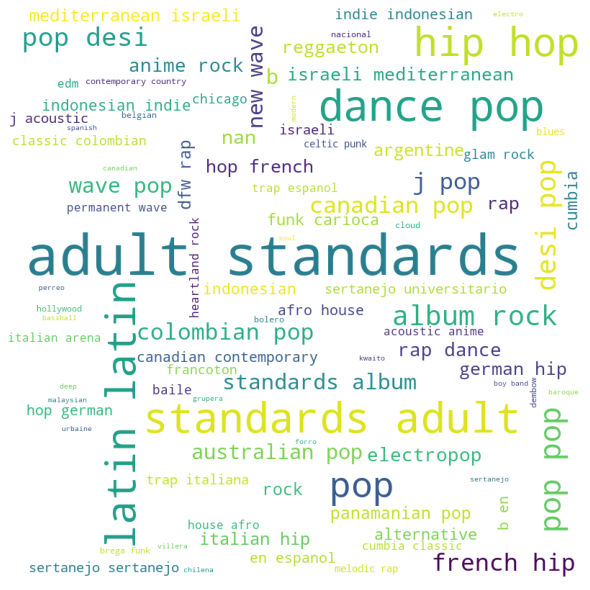

In [239]:
from wordcloud import WordCloud, STOPWORDS

genres = spotify['top genre']
comment_words = ''
stopwords = set(STOPWORDS)
for val in genres:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Text(0.5, 1.0, 'TOP GENRE VS POPULARITY')

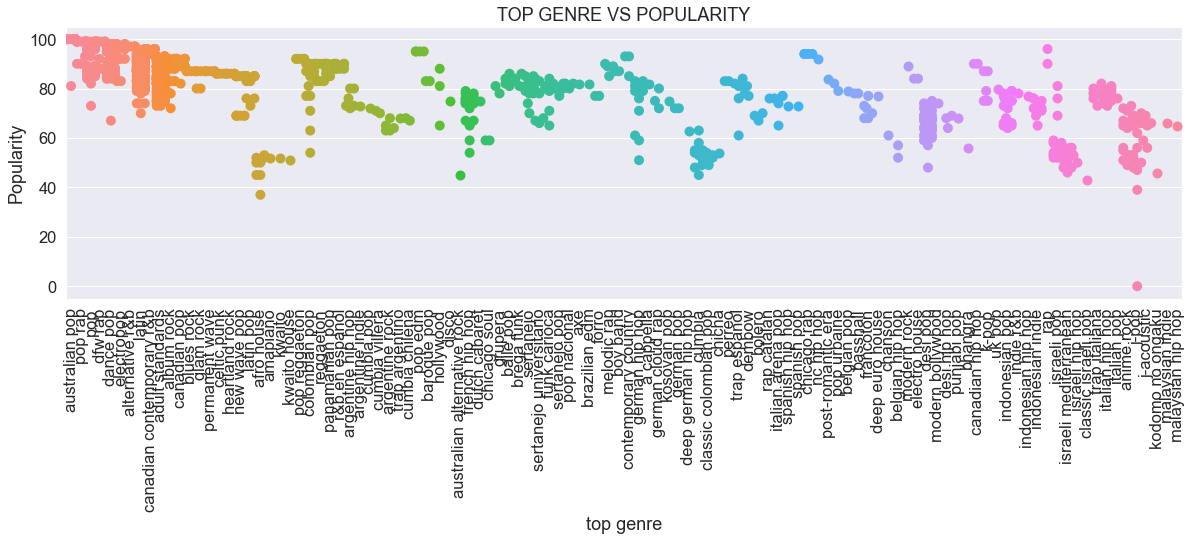

In [150]:
plt.figure(figsize=(20,5))
swarmplot=sns.swarmplot(x='top genre',y='Popularity',data=spotify,s=10)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title('TOP GENRE VS POPULARITY')

What we are observing that most of the countries tend to listen their own local cutlural type of musics. 

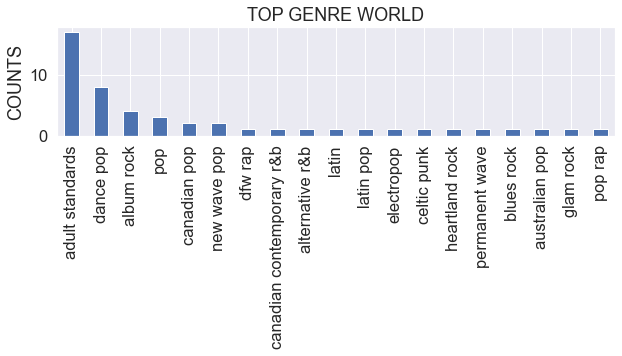

In [281]:
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'world']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE WORLD')
plt.ylabel('COUNTS')
plt.show()

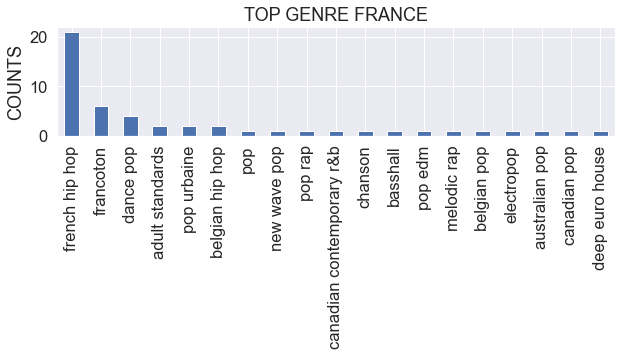

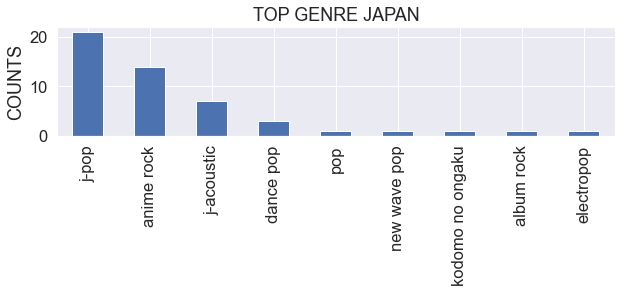

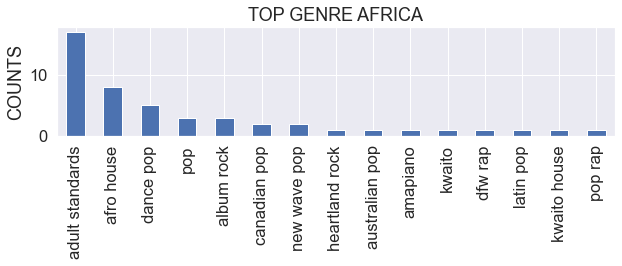

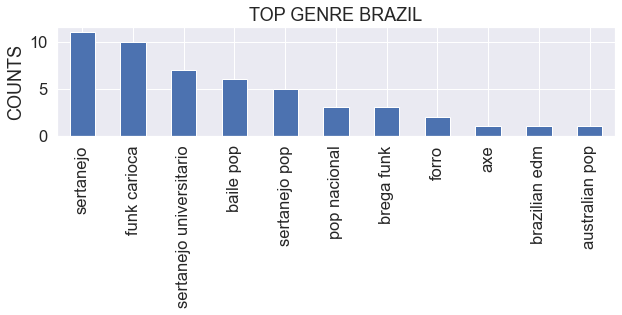

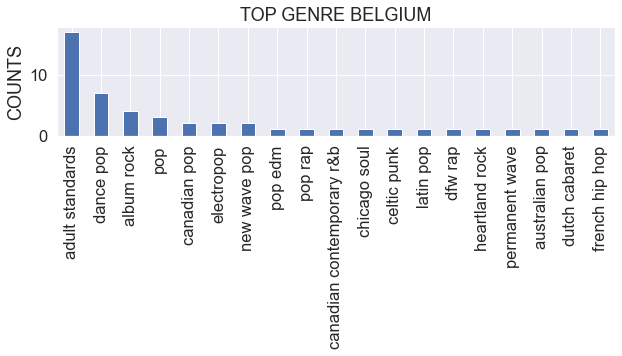

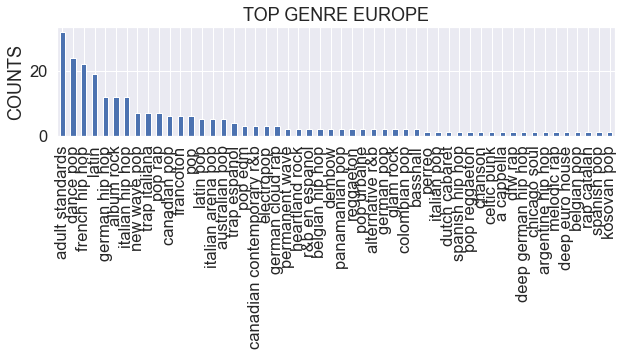

In [286]:
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'france']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE FRANCE')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'japan']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE JAPAN')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'africa']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE AFRICA')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'brazil']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE BRAZIL')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(10,2))
spotify[spotify['country'] == 'belgium']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE BELGIUM')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(10,2))
spotify[spotify['CONTINENT'] == 'EUROPE']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE EUROPE')
plt.ylabel('COUNTS')
plt.show()

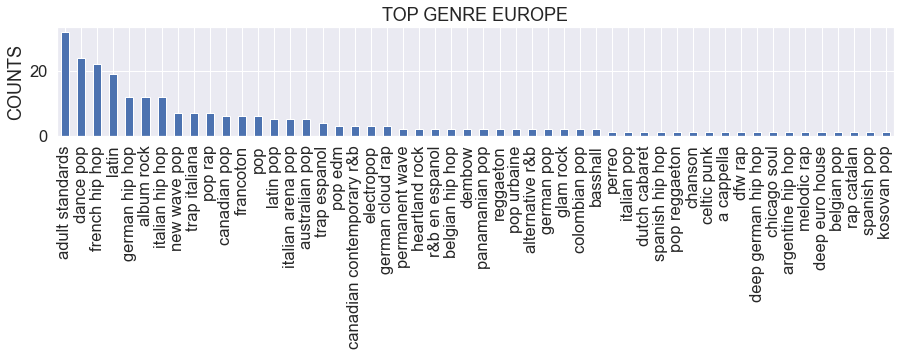

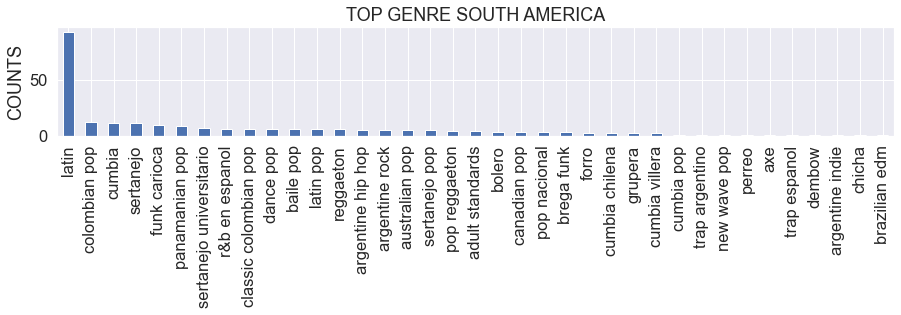

In [291]:
plt.figure(figsize=(15,2))
spotify[spotify['CONTINENT'] == 'EUROPE']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE EUROPE')
plt.ylabel('COUNTS')
plt.show()
plt.figure(figsize=(15,2))
spotify[spotify['CONTINENT'] == 'SOUTH AMERICA']['top genre'].value_counts().plot.bar()
plt.title('TOP GENRE SOUTH AMERICA')
plt.ylabel('COUNTS')
plt.show()

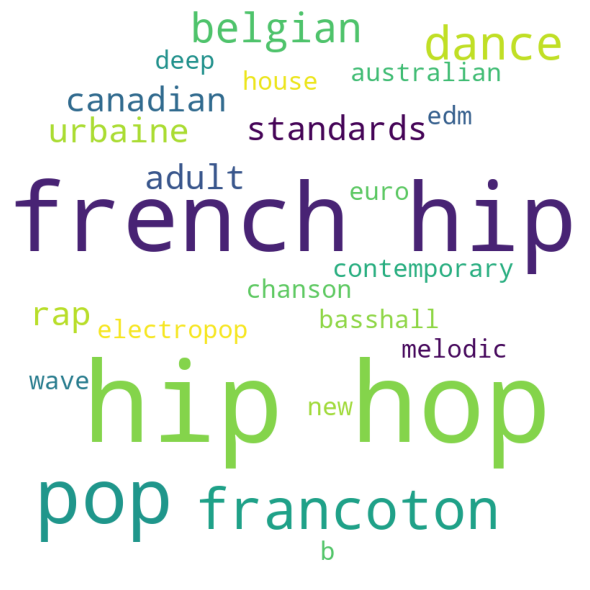

In [282]:
from wordcloud import WordCloud, STOPWORDS

genres = spotify[spotify['country']=='france']['top genre']
comment_words = ''
stopwords = set(STOPWORDS)
for val in genres:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()